In [24]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
data_2015=pd.read_csv('HCAHPS_2015.csv',engine='python')
data_2016=pd.read_csv('HCAHPS_2016.csv',engine='python')
data_2017=pd.read_csv('HCAHPS_2017.csv',engine='python')
data_2018=pd.read_csv('HCAHPS_2018.csv',engine='python')
data_2019=pd.read_csv('HCAHPS_2019.csv',engine='python')
data_2020=pd.read_csv('HCAHPS_2020.csv',engine='python')

In [4]:
data_2015.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,...,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_STAR_RATING,Summary star rating,...,NaN,Not Applicable,NaN,Not Applicable,1313,NaN,27,NaN,04/01/2014,03/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_A_P,Patients who reported that their room and bath...,...,NaN,66,NaN,Not Applicable,1313,NaN,27,NaN,04/01/2014,03/31/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_SN_P,Patients who reported that their room and bath...,...,NaN,12,NaN,Not Applicable,1313,NaN,27,NaN,04/01/2014,03/31/2015
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_U_P,Patients who reported that their room and bath...,...,NaN,22,NaN,Not Applicable,1313,NaN,27,NaN,04/01/2014,03/31/2015
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_LINEAR_SCORE,Cleanliness - linear mean score,...,NaN,Not Applicable,NaN,84,1313,NaN,27,NaN,04/01/2014,03/31/2015


In [5]:
#Determine column names for each of the data frames.
#Notice that some crtical column names have change for the 2019 dataset
print("\033[1m" +'2015 Data Types' + "\033[0m")
print(data_2015.columns)

print("\033[1m" +'2016 Data Types' + "\033[0m")
print(data_2016.columns)

print("\033[1m" +'2017 Data Types' + "\033[0m")
print(data_2017.columns)

print("\033[1m" +'2018 Data Types' + "\033[0m")
print(data_2018.columns)

print("\033[1m" +'2019 Data Types' + "\033[0m")
print(data_2019.columns)

print("\033[1m" +'2020 Data Types' + "\033[0m")
print(data_2020.columns)

2015 Data Types
Index(['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'HCAHPS Measure ID', 'HCAHPS Question',
       'HCAHPS Answer Description', 'Patient Survey Star Rating',
       'Patient Survey Star Rating Footnote', 'HCAHPS Answer Percent',
       'HCAHPS Answer Percent Footnote', 'HCAHPS Linear Mean Value',
       'Number of Completed Surveys', 'Number of Completed Surveys Footnote',
       'Survey Response Rate Percent', 'Survey Response Rate Percent Footnote',
       'Measure Start Date', 'Measure End Date'],
      dtype='object')
2016 Data Types
Index(['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'HCAHPS Measure ID', 'HCAHPS Question',
       'HCAHPS Answer Description', 'Patient Survey Star Rating',
       'Patient Survey Star Rating Footnote', 'HCAHPS Answer Percent',
       'HCAHPS Answer Percent Footnote', 'HCAHPS Linear Mean Value',
       'Numb

In [6]:
#Create seperate dataframes with limited number of selected columns for each time period
data_2015_filtered=pd.DataFrame(data_2015, columns=['Provider ID', 'Hospital Name', 'HCAHPS Measure ID', 
                                                   'HCAHPS Linear Mean Value', 'Measure Start Date', 'Measure End Date'])
data_2015_filtered=data_2015_filtered[data_2015_filtered['HCAHPS Measure ID'].isin(['H_COMP_6_LINEAR_SCORE'])]

data_2016_filtered=pd.DataFrame(data_2016, columns=['Provider ID', 'Hospital Name', 'HCAHPS Measure ID', 
                                                   'HCAHPS Linear Mean Value', 'Measure Start Date', 'Measure End Date'])
data_2016_filtered=data_2016_filtered[data_2016_filtered['HCAHPS Measure ID'].isin(['H_COMP_6_LINEAR_SCORE'])]

data_2017_filtered=pd.DataFrame(data_2017, columns=['Provider ID', 'Hospital Name', 'HCAHPS Measure ID', 
                                                   'HCAHPS Linear Mean Value', 'Measure Start Date', 'Measure End Date'])
data_2017_filtered=data_2017_filtered[data_2017_filtered['HCAHPS Measure ID'].isin(['H_COMP_6_LINEAR_SCORE'])]

data_2018_filtered=pd.DataFrame(data_2018, columns=['Provider ID', 'Hospital Name', 'HCAHPS Measure ID', 
                                                   'HCAHPS Linear Mean Value', 'Measure Start Date', 'Measure End Date'])
data_2018_filtered=data_2018_filtered[data_2018_filtered['HCAHPS Measure ID'].isin(['H_COMP_6_LINEAR_SCORE'])]

data_2019_filtered=pd.DataFrame(data_2019, columns=['Facility ID', 'Facility Name', 'HCAHPS Measure ID', 
                                                   'HCAHPS Linear Mean Value', 'Start Date', 'End Date'])
data_2019_filtered=data_2019_filtered[data_2019_filtered['HCAHPS Measure ID'].isin(['H_COMP_6_LINEAR_SCORE'])]

data_2020_filtered=pd.DataFrame(data_2020, columns=['Facility ID', 'Facility Name', 'HCAHPS Measure ID', 
                                                   'HCAHPS Linear Mean Value', 'Start Date', 'End Date'])
data_2020_filtered=data_2020_filtered[data_2020_filtered['HCAHPS Measure ID'].isin(['H_COMP_6_LINEAR_SCORE'])]

In [7]:
#Check resulting dataframe for 2015
data_2015_filtered.head()

,Provider ID,Hospital Name,HCAHPS Measure ID,HCAHPS Linear Mean Value,Measure Start Date,Measure End Date
31,10001,SOUTHEAST ALABAMA MEDICAL CENTER,H_COMP_6_LINEAR_SCORE,85,04/01/2014,03/31/2015
86,10005,MARSHALL MEDICAL CENTER SOUTH,H_COMP_6_LINEAR_SCORE,89,04/01/2014,03/31/2015
141,10006,ELIZA COFFEE MEMORIAL HOSPITAL,H_COMP_6_LINEAR_SCORE,82,04/01/2014,03/31/2015
196,10007,MIZELL MEMORIAL HOSPITAL,H_COMP_6_LINEAR_SCORE,82,04/01/2014,03/31/2015
251,10008,CRENSHAW COMMUNITY HOSPITAL,H_COMP_6_LINEAR_SCORE,Not Available,04/01/2014,03/31/2015


In [8]:
print("\033[1m" +'2015 Data Types' + "\033[0m")
print(data_2015_filtered.dtypes)

print("\033[1m" +'2016 Data Types' + "\033[0m")
print(data_2016_filtered.dtypes)

print("\033[1m" +'2017 Data Types' + "\033[0m")
print(data_2017_filtered.dtypes)

print("\033[1m" +'2018 Data Types' + "\033[0m")
print(data_2018_filtered.dtypes)

print("\033[1m" +'2019 Data Types' + "\033[0m")
print(data_2019_filtered.dtypes)

print("\033[1m" +'2020 Data Types' + "\033[0m")
print(data_2020_filtered.dtypes)

2015 Data Types
Provider ID                  int64
Hospital Name               object
HCAHPS Measure ID           object
HCAHPS Linear Mean Value    object
Measure Start Date          object
Measure End Date            object
dtype: object
2016 Data Types
Provider ID                  int64
Hospital Name               object
HCAHPS Measure ID           object
HCAHPS Linear Mean Value    object
Measure Start Date          object
Measure End Date            object
dtype: object
2017 Data Types
Provider ID                  int64
Hospital Name               object
HCAHPS Measure ID           object
HCAHPS Linear Mean Value    object
Measure Start Date          object
Measure End Date            object
dtype: object
2018 Data Types
Provider ID                 object
Hospital Name               object
HCAHPS Measure ID           object
HCAHPS Linear Mean Value    object
Measure Start Date          object
Measure End Date            object
dtype: object
2019 Data Types
Facility ID             

In [9]:
#Replace the "Not Available" entries with 0 and convert HCAHPS Linear Mean Value column to a float
data_2015_filtered ['HCAHPS Linear Mean Value'] = pd.to_numeric(data_2015_filtered['HCAHPS Linear Mean Value'], errors='coerce')
data_2015_filtered = data_2015_filtered.replace(np.nan,0,regex=True)

data_2016_filtered ['HCAHPS Linear Mean Value'] = pd.to_numeric(data_2016_filtered['HCAHPS Linear Mean Value'], errors='coerce')
data_2016_filtered = data_2016_filtered.replace(np.nan,0,regex=True)

data_2017_filtered ['HCAHPS Linear Mean Value'] = pd.to_numeric(data_2017_filtered['HCAHPS Linear Mean Value'], errors='coerce')
data_2017_filtered = data_2017_filtered.replace(np.nan,0,regex=True)

data_2018_filtered ['HCAHPS Linear Mean Value'] = pd.to_numeric(data_2018_filtered['HCAHPS Linear Mean Value'], errors='coerce')
data_2018_filtered = data_2018_filtered.replace(np.nan,0,regex=True)

data_2019_filtered ['HCAHPS Linear Mean Value'] = pd.to_numeric(data_2019_filtered['HCAHPS Linear Mean Value'], errors='coerce')
data_2019_filtered = data_2019_filtered.replace(np.nan,0,regex=True)

data_2020_filtered ['HCAHPS Linear Mean Value'] = pd.to_numeric(data_2020_filtered['HCAHPS Linear Mean Value'], errors='coerce')
data_2020_filtered = data_2020_filtered.replace(np.nan,0,regex=True)

In [10]:
print("\033[1m" +'2015 HCAHP Mean Value Float type' + "\033[0m")
print(data_2015_filtered['HCAHPS Linear Mean Value'].head(10))

print("\033[1m" +'2016 HCAHP Mean Value Float type' + "\033[0m")
print(data_2016_filtered['HCAHPS Linear Mean Value'].head(10))

print("\033[1m" +'2017 HCAHP Mean Value Float type' + "\033[0m")
print(data_2017_filtered['HCAHPS Linear Mean Value'].head(10))

print("\033[1m" +'2018 HCAHP Mean Value Float type' + "\033[0m")
print(data_2018_filtered['HCAHPS Linear Mean Value'].head(10))

print("\033[1m" +'2019 HCAHP Mean Value Float type' + "\033[0m")
print(data_2019_filtered['HCAHPS Linear Mean Value'].head(10))

print("\033[1m" +'2020 HCAHP Mean Value Float type' + "\033[0m")
print(data_2020_filtered['HCAHPS Linear Mean Value'].head(10))

2015 HCAHP Mean Value Float type
31     85.0
86     89.0
141    82.0
196    82.0
251     0.0
306    86.0
361    88.0
416    85.0
471     0.0
526    87.0
Name: HCAHPS Linear Mean Value, dtype: float64
2016 HCAHP Mean Value Float type
31     89.0
86     88.0
141    84.0
196    86.0
251     0.0
306    85.0
361    87.0
416    86.0
471     0.0
526    86.0
Name: HCAHPS Linear Mean Value, dtype: float64
2017 HCAHP Mean Value Float type
31     87.0
86     89.0
141    86.0
196    88.0
251     0.0
306    86.0
361    88.0
416    86.0
471     0.0
526    89.0
Name: HCAHPS Linear Mean Value, dtype: float64
2018 HCAHP Mean Value Float type
26     85.0
76     89.0
126    85.0
176    87.0
226     0.0
276    86.0
326    87.0
376    88.0
426     0.0
476    87.0
Name: HCAHPS Linear Mean Value, dtype: float64
2019 HCAHP Mean Value Float type
52     86.0
145    88.0
238    82.0
331    85.0
424     0.0
517    85.0
610    85.0
703    87.0
796     0.0
889    85.0
Name: HCAHPS Linear Mean Value, dtype: float64


In [11]:
data_2019_filtered.head()

,Facility ID,Facility Name,HCAHPS Measure ID,HCAHPS Linear Mean Value,Start Date,End Date
52,010001,SOUTHEAST ALABAMA MEDICAL CENTER,H_COMP_6_LINEAR_SCORE,86.0,01/01/2018,12/31/2018
145,010005,MARSHALL MEDICAL CENTER SOUTH,H_COMP_6_LINEAR_SCORE,88.0,01/01/2018,12/31/2018
238,010006,NORTH ALABAMA MEDICAL CENTER,H_COMP_6_LINEAR_SCORE,82.0,01/01/2018,12/31/2018
331,010007,MIZELL MEMORIAL HOSPITAL,H_COMP_6_LINEAR_SCORE,85.0,01/01/2018,12/31/2018
424,010008,CRENSHAW COMMUNITY HOSPITAL,H_COMP_6_LINEAR_SCORE,0.0,01/01/2018,12/31/2018


In [12]:
pids = ['JOHNS HOPKINS HOSPITAL, THE', 'GEORGE WASHINGTON UNIV HOSPITAL','MEDSTAR GEORGETOWN UNIVERSITY HOSPITAL',
        'MEDSTAR WASHINGTON HOSPITAL CENTER', 'INOVA FAIRFAX HOSPITAL', 'VIRGINIA HOSPITAL CENTER']

In [13]:
data_2015_filtered2 = pd.DataFrame(data_2015_filtered[(data_2015_filtered['Hospital Name'].isin(pids))])
print("\033[1m" +'2015 Filtered Dataset' + "\033[0m")
print(data_2015_filtered2.head(6))

data_2016_filtered2 = pd.DataFrame(data_2016_filtered[(data_2016_filtered['Hospital Name'].isin(pids))])
print("\033[1m" +'2016 Filtered Dataset' + "\033[0m")
print(data_2016_filtered2.head(6))

data_2017_filtered2 = pd.DataFrame(data_2017_filtered[(data_2017_filtered['Hospital Name'].isin(pids))])
print("\033[1m" +'2017 Filtered Dataset' + "\033[0m")
print(data_2017_filtered2.head(6))

data_2018_filtered2 = pd.DataFrame(data_2018_filtered[(data_2018_filtered['Hospital Name'].isin(pids))])
print("\033[1m" +'2018 Filtered Dataset' + "\033[0m")
print(data_2018_filtered2.head(6))

data_2019_filtered2 = pd.DataFrame(data_2019_filtered[(data_2019_filtered['Facility Name'].isin(pids))])
print("\033[1m" +'2019 Filtered Dataset' + "\033[0m")
print(data_2019_filtered2.head(6))

data_2020_filtered2 = pd.DataFrame(data_2020_filtered[(data_2020_filtered['Facility Name'].isin(pids))])
print("\033[1m" +'2020 Filtered Dataset' + "\033[0m")
print(data_2020_filtered2.head(6))

2015 Filtered Dataset
        Provider ID                           Hospital Name  \
38806         90001         GEORGE WASHINGTON UNIV HOSPITAL   
38916         90004  MEDSTAR GEORGETOWN UNIVERSITY HOSPITAL   
39136         90011      MEDSTAR WASHINGTON HOSPITAL CENTER   
102826       210009             JOHNS HOPKINS HOSPITAL, THE   
233561       490050                VIRGINIA HOSPITAL CENTER   
233891       490063                  INOVA FAIRFAX HOSPITAL   

            HCAHPS Measure ID  HCAHPS Linear Mean Value Measure Start Date  \
38806   H_COMP_6_LINEAR_SCORE                      81.0         04/01/2014   
38916   H_COMP_6_LINEAR_SCORE                      87.0         04/01/2014   
39136   H_COMP_6_LINEAR_SCORE                      84.0         04/01/2014   
102826  H_COMP_6_LINEAR_SCORE                      88.0         04/01/2014   
233561  H_COMP_6_LINEAR_SCORE                      88.0         04/01/2014   
233891  H_COMP_6_LINEAR_SCORE                      85.0         04/0

In [14]:
#Number of rows and columns from filtered dataframes
print(data_2015_filtered2.shape)
print(data_2016_filtered2.shape)
print(data_2017_filtered2.shape)
print(data_2018_filtered2.shape)
print(data_2019_filtered2.shape)
print(data_2020_filtered2.shape)

(6, 6)
(6, 6)
(6, 6)
(6, 6)
(6, 6)
(6, 6)


In [15]:
#Calculate average satisfation at THE UNIVERSITY OF CHICAGO MEDICAL CENTER across all 6 time periods
hosp = ['JOHNS HOPKINS HOSPITAL, THE']

data_2015_j = pd.DataFrame(data_2015_filtered2[(data_2015_filtered2['Hospital Name'].isin(hosp))])
avgsatis_j_2015 = data_2015_j['HCAHPS Linear Mean Value'].mean()

data_2016_j = pd.DataFrame(data_2016_filtered2[(data_2016_filtered2['Hospital Name'].isin(hosp))])
avgsatis_j_2016 = data_2016_j['HCAHPS Linear Mean Value'].mean()

data_2017_j = pd.DataFrame(data_2017_filtered2[(data_2017_filtered2['Hospital Name'].isin(hosp))])
avgsatis_j_2017 = data_2017_j['HCAHPS Linear Mean Value'].mean()

data_2018_j = pd.DataFrame(data_2018_filtered2[(data_2018_filtered2['Hospital Name'].isin(hosp))])
avgsatis_j_2018 = data_2018_j['HCAHPS Linear Mean Value'].mean()

data_2019_j = pd.DataFrame(data_2019_filtered2[(data_2019_filtered2['Facility Name'].isin(hosp))])
avgsatis_j_2019 = data_2019_j['HCAHPS Linear Mean Value'].mean()

data_2020_j = pd.DataFrame(data_2020_filtered2[(data_2020_filtered2['Facility Name'].isin(hosp))])
avgsatis_j_2020 = data_2020_j['HCAHPS Linear Mean Value'].mean()

print(avgsatis_j_2015)
print(avgsatis_j_2016)
print(avgsatis_j_2017)
print(avgsatis_j_2018)
print(avgsatis_j_2019)
print(avgsatis_j_2020)

88.0
89.0
0.0
88.0
89.0
90.0


In [16]:
#Calculate average satisfaction across all other hospitals for the 6 time periods

data_2015_dc = pd.DataFrame(data_2015_filtered2[(data_2015_filtered2['Hospital Name'] != 'JOHNS HOPKINS HOSPITAL, THE')])
avgsatis_dc_2015 = data_2015_dc['HCAHPS Linear Mean Value'].mean()

data_2016_dc = pd.DataFrame(data_2016_filtered2[(data_2016_filtered2['Hospital Name'] != 'JOHNS HOPKINS HOSPITAL, THE')])
avgsatis_dc_2016 = data_2016_dc['HCAHPS Linear Mean Value'].mean()

data_2017_dc = pd.DataFrame(data_2017_filtered2[(data_2017_filtered2['Hospital Name'] != 'JOHNS HOPKINS HOSPITAL, THE')])
avgsatis_dc_2017 = data_2017_dc['HCAHPS Linear Mean Value'].mean()

data_2018_dc = pd.DataFrame(data_2018_filtered2[(data_2018_filtered2['Hospital Name'] != 'JOHNS HOPKINS HOSPITAL, THE')])
avgsatis_dc_2018 = data_2018_dc['HCAHPS Linear Mean Value'].mean()

data_2019_dc = pd.DataFrame(data_2019_filtered2[(data_2019_filtered2['Facility Name'] != 'JOHNS HOPKINS HOSPITAL, THE')])
avgsatis_dc_2019 = data_2019_dc['HCAHPS Linear Mean Value'].mean()

data_2020_dc = pd.DataFrame(data_2020_filtered2[(data_2020_filtered2['Facility Name'] != 'JOHNS HOPKINS HOSPITAL, THE')])
avgsatis_dc_2020 = data_2020_dc['HCAHPS Linear Mean Value'].mean()

print(avgsatis_dc_2015)
print(avgsatis_dc_2016)
print(avgsatis_dc_2017)
print(avgsatis_dc_2018)
print(avgsatis_dc_2019)
print(avgsatis_dc_2020)

85.0
87.0
86.6
87.2
86.8
86.8


In [17]:
#Create a data frame containing dc and CHICAGO data from all 6 years in order to deterime grand average

df_all = [data_2015_filtered2['HCAHPS Linear Mean Value'],data_2016_filtered2['HCAHPS Linear Mean Value'],
          data_2017_filtered2['HCAHPS Linear Mean Value'],data_2018_filtered2['HCAHPS Linear Mean Value'],
          data_2019_filtered2['HCAHPS Linear Mean Value'],data_2020_filtered2['HCAHPS Linear Mean Value']]

headers = ['AllSatis2015', 'AllSatis2016', 'AllSatis2017', 'AllSatis2018', 'AllSatis2019', 'AllSatis2020']

df1_all=pd.concat(df_all, axis=1,keys=headers)
df1_all.head()

,AllSatis2015,AllSatis2016,AllSatis2017,AllSatis2018,AllSatis2019,AllSatis2020
36276,NaN,NaN,NaN,86.0,NaN,NaN
36376,NaN,NaN,NaN,88.0,NaN,NaN
36576,NaN,NaN,NaN,85.0,NaN,NaN
38806,81.0,NaN,NaN,NaN,NaN,NaN
38916,87.0,NaN,NaN,NaN,NaN,NaN


In [18]:
#Grand Average
avgall=df1_all.stack().mean()
avgall

84.47222222222223

In [19]:
#Standard Deviation for all data across the 6 years (includes CHICAGO data)
stdall=df1_all.stack().std()
stdall

14.649204973281192

In [20]:
#Create a data frame containing DC satisfaction data from all 6 years
df=[data_2015_dc['HCAHPS Linear Mean Value'],data_2016_dc['HCAHPS Linear Mean Value'],
    data_2017_dc['HCAHPS Linear Mean Value'],data_2018_dc['HCAHPS Linear Mean Value'],
    data_2019_dc['HCAHPS Linear Mean Value'],data_2020_dc['HCAHPS Linear Mean Value']]

headers = ['Satis2015', 'Satis2016', 'Satis2017', 'Satis2018', 'Satis2019', 'Satis2020']

df1=pd.concat(df, axis=1,keys=headers)
df1.head()

,Satis2015,Satis2016,Satis2017,Satis2018,Satis2019,Satis2020
36276,NaN,NaN,NaN,86.0,NaN,NaN
36376,NaN,NaN,NaN,88.0,NaN,NaN
36576,NaN,NaN,NaN,85.0,NaN,NaN
38806,81.0,NaN,NaN,NaN,NaN,NaN
38916,87.0,NaN,NaN,NaN,NaN,NaN


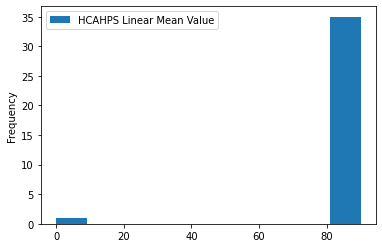

In [21]:
#Check for Normal Distribution
df_checknorm = data_2015_filtered2['HCAHPS Linear Mean Value']
df_checknorm2 = df_checknorm.append(data_2016_filtered2['HCAHPS Linear Mean Value'])
df_checknorm3 = df_checknorm2.append(data_2017_filtered2['HCAHPS Linear Mean Value'])
df_checknorm4 = df_checknorm3.append(data_2018_filtered2['HCAHPS Linear Mean Value'])
df_checknorm5 = df_checknorm4.append(data_2019_filtered2['HCAHPS Linear Mean Value'])
df_checknorm6 = df_checknorm5.append(data_2019_filtered2['HCAHPS Linear Mean Value'])
df_checknorm6

df_checknorm7=pd.DataFrame(df_checknorm6)
df_checknorm7[['HCAHPS Linear Mean Value']].plot.hist()

In [22]:
#Average per time period
avg2015 = df1['Satis2015'].mean()
avg2016 = df1['Satis2016'].mean()
avg2017 = df1['Satis2017'].mean()
avg2018 = df1['Satis2018'].mean()
avg2019 = df1['Satis2019'].mean()
avg2020 = df1['Satis2020'].mean()

print(avg2015)
print(avg2016)
print(avg2017)
print(avg2018)
print(avg2019)
print(avg2020)

85.0
87.0
86.6
87.2
86.8
86.8


In [23]:
#Find Count of hospitals in each year
n_2015=int(df1['Satis2015'].count())
n_2016=int(df1['Satis2016'].count())
n_2017=int(df1['Satis2017'].count())
n_2018=int(df1['Satis2018'].count())
n_2019=int(df1['Satis2019'].count())
n_2020=int(df1['Satis2020'].count())

print(n_2015)
print(n_2016)
print(n_2017)
print(n_2018)
print(n_2019)
print(n_2020)

5
5
5
5
5
5


In [24]:
#Standard Deviation of each timeperiod
std2015 = stdall/(math.sqrt(n_2015))
std2016 = stdall/(math.sqrt(n_2016))
std2017 = stdall/(math.sqrt(n_2017))
std2018 = stdall/(math.sqrt(n_2018))
std2019 = stdall/(math.sqrt(n_2019))
std2020 = stdall/(math.sqrt(n_2020))

print(std2015)
print(std2016)
print(std2017)
print(std2018)
print(std2019)
print(std2020)

6.551323627316947
6.551323627316947
6.551323627316947
6.551323627316947
6.551323627316947
6.551323627316947


In [25]:
zstat = 1.96

In [26]:
#Create dataframe holding values that will support the calculation of UCL and LCL
df3 = [['2015',avgsatis_j_2015,avg2015,std2015,avgall,zstat],
       ['2016',avgsatis_j_2016,avg2016,std2016,avgall,zstat],
       ['2017',88.5,avg2017,std2017,avgall,zstat],
       ['2018',avgsatis_j_2018,avg2018,std2018,avgall,zstat],
       ['2019',avgsatis_j_2019,avg2019,std2019,avgall,zstat],
       ['2020',avgsatis_j_2020,avg2020,std2020,avgall,zstat]]
df3

[['2015', 88.0, 85.0, 6.551323627316947, 84.47222222222223, 1.96],
 ['2016', 89.0, 87.0, 6.551323627316947, 84.47222222222223, 1.96],
 ['2017', 88.5, 86.6, 6.551323627316947, 84.47222222222223, 1.96],
 ['2018', 88.0, 87.2, 6.551323627316947, 84.47222222222223, 1.96],
 ['2019', 89.0, 86.8, 6.551323627316947, 84.47222222222223, 1.96],
 ['2020', 90.0, 86.8, 6.551323627316947, 84.47222222222223, 1.96]]

In [27]:
#add column names to the df3 dataframe
df4 = pd.DataFrame(df3,columns = ['Year', 'Johns Hopkins Hospital', 'Avg Satisfaction DC Hosp', 
                                  'StdPerTime', 'Avg Satisfaction All', 'zstat'])
df4

,Year,Johns Hopkins Hospital,Avg Satisfaction DC Hosp,StdPerTime,Avg Satisfaction All,zstat
0,2015,88.0,85.0,6.551324,84.472222,1.96
1,2016,89.0,87.0,6.551324,84.472222,1.96
2,2017,88.5,86.6,6.551324,84.472222,1.96
3,2018,88.0,87.2,6.551324,84.472222,1.96
4,2019,89.0,86.8,6.551324,84.472222,1.96
5,2020,90.0,86.8,6.551324,84.472222,1.96


In [28]:
#Calculate the UCL and LCL columns
df4['UCL for DC Hospitals']=df4['Avg Satisfaction All']+df4['zstat']*df4['StdPerTime']
df4['LCL for DC Hospitals']=df4['Avg Satisfaction All']-df4['zstat']*df4['StdPerTime']
df4

,Year,Johns Hopkins Hospital,Avg Satisfaction DC Hosp,StdPerTime,Avg Satisfaction All,zstat,UCL for DC Hospitals,LCL for DC Hospitals
0,2015,88.0,85.0,6.551324,84.472222,1.96,97.312817,71.631628
1,2016,89.0,87.0,6.551324,84.472222,1.96,97.312817,71.631628
2,2017,88.5,86.6,6.551324,84.472222,1.96,97.312817,71.631628
3,2018,88.0,87.2,6.551324,84.472222,1.96,97.312817,71.631628
4,2019,89.0,86.8,6.551324,84.472222,1.96,97.312817,71.631628
5,2020,90.0,86.8,6.551324,84.472222,1.96,97.312817,71.631628


Text(0, 0.5, 'Satisfaction Rating')

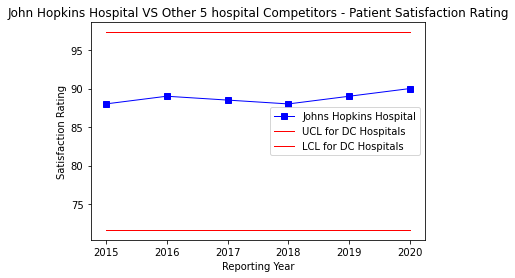

In [29]:
#Create the xbar chart

plt.plot('Year','Johns Hopkins Hospital',data=df4,marker = 's', markerfacecolor = 'blue',
         linewidth =1, color = 'blue')

plt.plot('Year','UCL for DC Hospitals', data=df4, markersize = 0, color = 'red', linewidth=1)
plt.plot('Year','LCL for DC Hospitals', data=df4, markersize = 0, color = 'red', linewidth=1)
plt.legend()
plt.title('John Hopkins Hospital VS Other 5 hospital Competitors - Patient Satisfaction Rating')
plt.xlabel('Reporting Year')
plt.ylabel('Satisfaction Rating')

# 2.

In [30]:
data_2015=pd.read_csv('Payment_and_Value_of_Care_2015.csv')
data_2016=pd.read_csv('Payment_and_Value_of_Care_2016.csv')
data_2017=pd.read_csv('Payment_and_Value_of_Care_2017.csv')
data_2018=pd.read_csv('Payment_and_Value_of_Care_2018.csv')
data_2019=pd.read_csv('Payment_and_Value_of_Care_2019.csv')
data_2020=pd.read_csv('Payment_and_Value_of_Care_2020.csv')

In [31]:
data_2019.head()

,Facility ID,Facility Name,Address,City,State,ZIP Code,County Name,Phone Number,Payment Measure ID,Payment Measure Name,...,Payment,Lower Estimate,Higher Estimate,Payment Footnote,Value of Care Display ID,Value of Care Display Name,Value of Care Category,Value of Care Footnote,Start Date,End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,PAYM_30_AMI,Payment for heart attack patients,...,"$24,216","$22,939","$25,579",NaN,MORT_PAYM_30_AMI,Value of Care Heart Attack measure,Average Mortality and Average Payment,NaN,07/01/2015,06/30/2018
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,PAYM_30_HF,Payment for heart failure patients,...,"$17,716","$16,905","$18,523",NaN,MORT_PAYM_30_HF,Value of Care Heart Failure measur,Average Mortality and Average Payment,NaN,07/01/2015,06/30/2018
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,PAYM_30_PN,Payment for pneumonia patients,...,"$19,203","$18,191","$20,214",NaN,MORT_PAYM_30_PN,Value of Care Pneumonia measure,Average Mortality and Higher Payment,NaN,07/01/2015,06/30/2018
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,PAYM_90_HIP_KNEE,Payment for hip/knee replacement patients,...,"$24,984","$23,894","$26,172",NaN,COMP_PAYM_90_HIP_KNEE,Value of Care hip/knee replacement,Average Complications and Higher Payment,NaN,04/01/2015,03/31/2018
4,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,(256) 593-8310,PAYM_30_AMI,Payment for heart attack patients,...,"$22,697","$20,225","$25,559",NaN,MORT_PAYM_30_AMI,Value of Care Heart Attack measure,Average Mortality and Average Payment,NaN,07/01/2015,06/30/2018


In [32]:
#Create seperate dataframes with limited number of selected columns for each time period
data_2015_filtered=pd.DataFrame(data_2015, columns=['Provider ID', 'Hospital name', 'Payment measure ID', 'Denominator', 
                                                   'Payment', 'Measure start date', 'Measure end date'])
data_2016_filtered=pd.DataFrame(data_2016, columns=['Provider ID', 'Hospital name', 'Payment measure ID', 'Denominator', 
                                                   'Payment', 'Measure start date', 'Measure end date'])
data_2017_filtered=pd.DataFrame(data_2017, columns=['Provider ID', 'Hospital name', 'Payment measure ID', 'Denominator', 
                                                   'Payment', 'Measure start date', 'Measure end date'])
data_2018_filtered=pd.DataFrame(data_2018, columns=['Provider ID', 'Hospital name', 'Payment measure ID', 'Denominator', 
                                                   'Payment', 'Measure start date', 'Measure end date'])
data_2019_filtered=pd.DataFrame(data_2019, columns=['Facility ID', 'Facility Name', 'Payment Measure ID', 'Denominator', 
                                                   'Payment', 'Start date', 'End date'])
data_2020_filtered=pd.DataFrame(data_2020, columns=['Facility ID', 'Facility Name', 'Payment Measure ID', 'Denominator', 
                                                   'Payment', 'Start date', 'End date'])

In [33]:
#Find number of rows and columns for the six data frames
print(data_2015_filtered.shape)
print(data_2016_filtered.shape)
print(data_2017_filtered.shape)
print(data_2018_filtered.shape)
print(data_2019_filtered.shape)
print(data_2020_filtered.shape)

(14301, 7)
(14421, 7)
(19248, 7)
(19172, 7)
(19028, 7)
(18896, 7)


In [34]:
print("\033[1m" +'2015 Data Types' + "\033[0m")
print(data_2015_filtered.dtypes)

print("\033[1m" +'2016 Data Types' + "\033[0m")
print(data_2016_filtered.dtypes)

print("\033[1m" +'2017 Data Types' + "\033[0m")
print(data_2017_filtered.dtypes)

print("\033[1m" +'2018 Data Types' + "\033[0m")
print(data_2018_filtered.dtypes)

print("\033[1m" +'2019 Data Types' + "\033[0m")
print(data_2019_filtered.dtypes)

print("\033[1m" +'2020 Data Types' + "\033[0m")
print(data_2020_filtered.dtypes)

2015 Data Types
Provider ID           object
Hospital name         object
Payment measure ID    object
Denominator           object
Payment               object
Measure start date    object
Measure end date      object
dtype: object
2016 Data Types
Provider ID            int64
Hospital name         object
Payment measure ID    object
Denominator           object
Payment               object
Measure start date    object
Measure end date      object
dtype: object
2017 Data Types
Provider ID            int64
Hospital name         object
Payment measure ID    object
Denominator           object
Payment               object
Measure start date    object
Measure end date      object
dtype: object
2018 Data Types
Provider ID            int64
Hospital name         object
Payment measure ID    object
Denominator           object
Payment               object
Measure start date    object
Measure end date      object
dtype: object
2019 Data Types
Facility ID             int64
Facility Name         

In [35]:
#Remove the '$' and ',' using str.replace for the Payment column
data_2015_filtered['Payment'] = data_2015_filtered['Payment'].str.replace(',','')
data_2015_filtered['Payment'] = data_2015_filtered['Payment'].str.replace('$','')

data_2016_filtered['Payment'] = data_2016_filtered['Payment'].str.replace(',','')
data_2016_filtered['Payment'] = data_2016_filtered['Payment'].str.replace('$','')

data_2017_filtered['Payment'] = data_2017_filtered['Payment'].str.replace(',','')
data_2017_filtered['Payment'] = data_2017_filtered['Payment'].str.replace('$','')

data_2018_filtered['Payment'] = data_2018_filtered['Payment'].str.replace(',','')
data_2018_filtered['Payment'] = data_2018_filtered['Payment'].str.replace('$','')

data_2019_filtered['Payment'] = data_2019_filtered['Payment'].str.replace(',','')
data_2019_filtered['Payment'] = data_2019_filtered['Payment'].str.replace('$','')

data_2020_filtered['Payment'] = data_2020_filtered['Payment'].str.replace(',','')
data_2020_filtered['Payment'] = data_2020_filtered['Payment'].str.replace('$','')

print("\033[1m" +'2015 Payment' + "\033[0m")
print(data_2015_filtered['Payment'].head(10))
print("\033[1m" +'2016 Payment' + "\033[0m")
print(data_2016_filtered['Payment'].head(10))
print("\033[1m" +'2017 Payment' + "\033[0m")
print(data_2017_filtered['Payment'].head(10))
print("\033[1m" +'2018 Payment' + "\033[0m")
print(data_2018_filtered['Payment'].head(10))
print("\033[1m" +'2019 Payment' + "\033[0m")
print(data_2019_filtered['Payment'].head(10))
print("\033[1m" +'2020 Payment' + "\033[0m")
print(data_2020_filtered['Payment'].head(10))

2015 Payment
0            21376
1            14740
2            15263
3            21601
4            15087
5            14199
6            20247
7            14784
8            14018
9    Not Available
Name: Payment, dtype: object
2016 Payment
0            21804
1            15659
2            15089
3            23171
4            16376
5            14384
6            20946
7            14880
8            15066
9    Not Available
Name: Payment, dtype: object
2017 Payment
0    22178
1    16525
2    26863
3    17230
4    22133
5    16321
6    23545
7    15882
8    22682
9    15465
Name: Payment, dtype: object
2018 Payment
0    23394
1    17041
2    25812
3    18281
4    22579
5    15819
6    22747
7    15614
8    24002
9    16334
Name: Payment, dtype: object
2019 Payment
0    24216
1    17716
2    19203
3    24984
4    22697
5    16867
6    15973
7    22051
8    25008
9    16820
Name: Payment, dtype: object
2020 Payment
0    24216
1    17716
2    19203
3    24984
4    22697
5    16867
6

In [36]:
#Replace the "Not Available" entries with 0 and convert Payment column to a float
data_2015_filtered['Payment']=pd.to_numeric(data_2015_filtered['Payment'], errors='coerce')
data_2015_filtered=data_2015_filtered.replace(np.nan, 0, regex=True)
data_2016_filtered['Payment']=pd.to_numeric(data_2016_filtered['Payment'], errors='coerce')
data_2016_filtered=data_2016_filtered.replace(np.nan, 0, regex=True)
data_2017_filtered['Payment']=pd.to_numeric(data_2017_filtered['Payment'], errors='coerce')
data_2017_filtered=data_2017_filtered.replace(np.nan, 0, regex=True)
data_2018_filtered['Payment']=pd.to_numeric(data_2018_filtered['Payment'], errors='coerce')
data_2018_filtered=data_2018_filtered.replace(np.nan, 0, regex=True)
data_2019_filtered['Payment']=pd.to_numeric(data_2019_filtered['Payment'], errors='coerce')
data_2019_filtered=data_2019_filtered.replace(np.nan, 0, regex=True)
data_2020_filtered['Payment']=pd.to_numeric(data_2020_filtered['Payment'], errors='coerce')
data_2020_filtered=data_2020_filtered.replace(np.nan, 0, regex=True)

In [37]:
print("\033[1m" +'2015 Payment in Float type' + "\033[0m")
print(data_2015_filtered['Payment'].head(10))
print("\033[1m" +'2016 Payment in Float type'+"\033[0m")
print(data_2016_filtered['Payment'].head(10))
print("\033[1m" +'2017 Payment in Float type'+"\033[0m")
print(data_2017_filtered['Payment'].head(10))
print("\033[1m" +'2018 Payment in Float type'+"\033[0m")
print(data_2018_filtered['Payment'].head(10))
print("\033[1m" +'2019 Payment in Float type' + "\033[0m")
print(data_2019_filtered['Payment'].head(10))
print("\033[1m" +'2020 Payment in Float type'+"\033[0m")
print(data_2020_filtered['Payment'].head(10))

2015 Payment in Float type
0    21376.0
1    14740.0
2    15263.0
3    21601.0
4    15087.0
5    14199.0
6    20247.0
7    14784.0
8    14018.0
9        0.0
Name: Payment, dtype: float64
2016 Payment in Float type
0    21804.0
1    15659.0
2    15089.0
3    23171.0
4    16376.0
5    14384.0
6    20946.0
7    14880.0
8    15066.0
9        0.0
Name: Payment, dtype: float64
2017 Payment in Float type
0    22178.0
1    16525.0
2    26863.0
3    17230.0
4    22133.0
5    16321.0
6    23545.0
7    15882.0
8    22682.0
9    15465.0
Name: Payment, dtype: float64
2018 Payment in Float type
0    23394.0
1    17041.0
2    25812.0
3    18281.0
4    22579.0
5    15819.0
6    22747.0
7    15614.0
8    24002.0
9    16334.0
Name: Payment, dtype: float64
2019 Payment in Float type
0    24216.0
1    17716.0
2    19203.0
3    24984.0
4    22697.0
5    16867.0
6    15973.0
7    22051.0
8    25008.0
9    16820.0
Name: Payment, dtype: float64
2020 Payment in Float type
0    24216.0
1    17716.0
2    19203.0

In [38]:
#Converting the 'Denominator' data type to float
#If 'coerce', then invalid parsing will be set as NaN.
data_2015_filtered['Denominator']=pd.to_numeric(data_2015_filtered['Denominator'], errors = 'coerce')
data_2016_filtered['Denominator']=pd.to_numeric(data_2016_filtered['Denominator'], errors = 'coerce')
data_2017_filtered['Denominator']=pd.to_numeric(data_2017_filtered['Denominator'], errors = 'coerce')
data_2018_filtered['Denominator']=pd.to_numeric(data_2018_filtered['Denominator'], errors = 'coerce')
data_2019_filtered['Denominator']=pd.to_numeric(data_2019_filtered['Denominator'], errors = 'coerce')
data_2020_filtered['Denominator']=pd.to_numeric(data_2020_filtered['Denominator'], errors = 'coerce')

In [39]:
#Check data type for 2015 dataframe. Note that the Payment column is now of float datatype
data_2015_filtered.dtypes

Provider ID            object
Hospital name          object
Payment measure ID     object
Denominator           float64
Payment               float64
Measure start date     object
Measure end date       object
dtype: object

In [40]:
pids = ['JOHNS HOPKINS HOSPITAL, THE', 'GEORGE WASHINGTON UNIV HOSPITAL','MEDSTAR GEORGETOWN UNIVERSITY HOSPITAL',
        'MEDSTAR WASHINGTON HOSPITAL CENTER', 'INOVA FAIRFAX HOSPITAL', 'VIRGINIA HOSPITAL CENTER']

In [41]:
data_2015_filtered2 = pd.DataFrame(data_2015_filtered[(data_2015_filtered['Hospital name'].isin(pids))])
print("\033[1m" +'2015 Filtered Dataset' + "\033[0m")
print(data_2015_filtered2.head(6))

data_2016_filtered2 = pd.DataFrame(data_2016_filtered[(data_2016_filtered['Hospital name'].isin(pids))])
print("\033[1m" +'2016 Filtered Dataset' + "\033[0m")
print(data_2016_filtered2.head(6))

data_2017_filtered2 = pd.DataFrame(data_2017_filtered[(data_2017_filtered['Hospital name'].isin(pids))])
print("\033[1m" +'2017 Filtered Dataset' + "\033[0m")
print(data_2017_filtered2.head(6))

data_2018_filtered2 = pd.DataFrame(data_2018_filtered[(data_2018_filtered['Hospital name'].isin(pids))])
print("\033[1m" +'2018 Filtered Dataset' + "\033[0m")
print(data_2018_filtered2.head(6))

data_2019_filtered2 = pd.DataFrame(data_2019_filtered[(data_2019_filtered['Facility Name'].isin(pids))])
print("\033[1m" +'2019 Filtered Dataset' + "\033[0m")
print(data_2019_filtered2.head(6))

data_2020_filtered2 = pd.DataFrame(data_2020_filtered[(data_2020_filtered['Facility Name'].isin(pids))])
print("\033[1m" +'2020 Filtered Dataset' + "\033[0m")
print(data_2020_filtered2.head(6))

2015 Filtered Dataset
     Provider ID                           Hospital name Payment measure ID  \
2175      090001         GEORGE WASHINGTON UNIV HOSPITAL        PAYM_30_AMI   
2176      090001         GEORGE WASHINGTON UNIV HOSPITAL         PAYM_30_HF   
2177      090001         GEORGE WASHINGTON UNIV HOSPITAL         PAYM_30_PN   
2181      090004  MEDSTAR GEORGETOWN UNIVERSITY HOSPITAL        PAYM_30_AMI   
2182      090004  MEDSTAR GEORGETOWN UNIVERSITY HOSPITAL         PAYM_30_HF   
2183      090004  MEDSTAR GEORGETOWN UNIVERSITY HOSPITAL         PAYM_30_PN   

      Denominator  Payment Measure start date Measure end date  
2175        147.0  21125.0         07/01/2011       06/30/2014  
2176        201.0  15067.0         07/01/2011       06/30/2014  
2177        159.0  14734.0         07/01/2011       06/30/2014  
2181         27.0  20572.0         07/01/2011       06/30/2014  
2182        100.0  14698.0         07/01/2011       06/30/2014  
2183        179.0  17417.0        

In [42]:
#Filter by 'Denominator' 100 or more and limit to PATM_30_AMI measure as well as payment is not 0
data_2015_filtered3=pd.DataFrame(data_2015_filtered2[(data_2015_filtered2['Denominator']>=100) &
                                (data_2015_filtered2['Payment measure ID'] == 'PAYM_30_AMI') &
                                (data_2015_filtered2['Payment'] > 0)])
print("\033[1m"+'2015 Filtered Dataset' + "\033[0m")
print(data_2015_filtered3.head(10))

data_2016_filtered3=pd.DataFrame(data_2016_filtered2[(data_2016_filtered2['Denominator']>=100) &
                                (data_2016_filtered2['Payment measure ID'] == 'PAYM_30_AMI') &
                                (data_2016_filtered2['Payment'] > 0)])
print("\033[1m"+'2016 Filtered Dataset' + "\033[0m")
print(data_2016_filtered3.head(10))

data_2017_filtered3=pd.DataFrame(data_2017_filtered2[(data_2017_filtered2['Denominator']>=100) &
                                (data_2017_filtered2['Payment measure ID'] == 'PAYM_30_AMI') &
                                (data_2017_filtered2['Payment'] > 0)])
print("\033[1m" + '2017 Filtered Dataset' + "\033[0m")
print(data_2017_filtered3.head(10))

data_2018_filtered3=pd.DataFrame(data_2018_filtered2[(data_2018_filtered2['Denominator']>=100) &
                                (data_2018_filtered2['Payment measure ID'] == 'PAYM_30_AMI') &
                                (data_2018_filtered2['Payment'] > 0)])
print("\033[1m"+'2018 Filtered Dataset' + "\033[0m")
print(data_2018_filtered3.head(10))

data_2019_filtered3=pd.DataFrame(data_2019_filtered2[(data_2019_filtered2['Denominator']>=100) &
                                (data_2019_filtered2['Payment Measure ID'] == 'PAYM_30_AMI') &
                                (data_2019_filtered2['Payment'] > 0)])
print("\033[1m"+'2019 Filtered Dataset' + "\033[0m")
print(data_2019_filtered3.head(10))

data_2020_filtered3=pd.DataFrame(data_2020_filtered2[(data_2020_filtered2['Denominator']>=100) &
                                (data_2020_filtered2['Payment Measure ID'] == 'PAYM_30_AMI') &
                                (data_2020_filtered2['Payment'] > 0)])
print("\033[1m"+'2020 Filtered Dataset' + "\033[0m")
print(data_2020_filtered3.head(10))

2015 Filtered Dataset
      Provider ID                       Hospital name Payment measure ID  \
2175       090001     GEORGE WASHINGTON UNIV HOSPITAL        PAYM_30_AMI   
2193       090011  MEDSTAR WASHINGTON HOSPITAL CENTER        PAYM_30_AMI   
5745       210009         JOHNS HOPKINS HOSPITAL, THE        PAYM_30_AMI   
13074      490050            VIRGINIA HOSPITAL CENTER        PAYM_30_AMI   
13092      490063              INOVA FAIRFAX HOSPITAL        PAYM_30_AMI   

       Denominator  Payment Measure start date Measure end date  
2175         147.0  21125.0         07/01/2011       06/30/2014  
2193         923.0  22906.0         07/01/2011       06/30/2014  
5745         208.0  21553.0         07/01/2011       06/30/2014  
13074        141.0  20454.0         07/01/2011       06/30/2014  
13092        566.0  23274.0         07/01/2011       06/30/2014  
2016 Filtered Dataset
       Provider ID                       Hospital name Payment measure ID  \
2169         90001     GEO

In [43]:
#Number of rows and columns from filtered dataframes
print(data_2015_filtered3.shape)
print(data_2016_filtered3.shape)
print(data_2017_filtered3.shape)
print(data_2018_filtered3.shape)
print(data_2019_filtered3.shape)
print(data_2020_filtered3.shape)

(5, 7)
(4, 7)
(4, 7)
(5, 7)
(5, 7)
(5, 7)


In [44]:
#Calculate average payment across all hospitals for the four time periods
data_2015_filtered3['avg_payment_2015'] = data_2015_filtered3['Payment'].mean()
avg_payment_2015 = data_2015_filtered3['Payment'].mean()
avg_payment_2016 = data_2016_filtered3['Payment'].mean()
avg_payment_2017 = data_2017_filtered3['Payment'].mean()
avg_payment_2018 = data_2018_filtered3['Payment'].mean()
avg_payment_2019 = data_2019_filtered3['Payment'].mean()
avg_payment_2020 = data_2020_filtered3['Payment'].mean()
print(avg_payment_2015)
print(avg_payment_2016)
print(avg_payment_2017)
print(avg_payment_2018)
print(avg_payment_2019)
print(avg_payment_2020)

21862.4
22442.25
22521.5
24231.2
25552.0
25552.0


In [45]:
#Calculate average satisfation at JOHNS HOPKINS HOSPITAL across all 6 time periods
hosp = ['JOHNS HOPKINS HOSPITAL, THE']

data_2015_j = pd.DataFrame(data_2015_filtered3[(data_2015_filtered3['Hospital name'].isin(hosp))])
avg_payment_2015_j = data_2015_j['Payment'].mean()

data_2016_j = pd.DataFrame(data_2016_filtered3[(data_2016_filtered3['Hospital name'].isin(hosp))])
avg_payment_2016_j = data_2016_j['Payment'].mean()

data_2017_j = pd.DataFrame(data_2017_filtered3[(data_2017_filtered3['Hospital name'].isin(hosp))])
avg_payment_2017_j = data_2017_j['Payment'].mean()

data_2018_j = pd.DataFrame(data_2018_filtered3[(data_2018_filtered3['Hospital name'].isin(hosp))])
avg_payment_2018_j = data_2018_j['Payment'].mean()

data_2019_j = pd.DataFrame(data_2019_filtered3[(data_2019_filtered3['Facility Name'].isin(hosp))])
avg_payment_2019_j = data_2019_j['Payment'].mean()

data_2020_j = pd.DataFrame(data_2020_filtered3[(data_2020_filtered3['Facility Name'].isin(hosp))])
avg_payment_2020_j = data_2020_filtered3['Payment'].mean()

print(avg_payment_2015_j)
print(avg_payment_2016_j)
print(avg_payment_2017_j)
print(avg_payment_2018_j)
print(avg_payment_2019_j)
print(avg_payment_2020_j)

21553.0
nan
nan
24313.0
25539.0
25552.0


In [46]:
#Create a data frame containing Payment data from all 6 years
df = [data_2015_filtered3['Payment'], data_2016_filtered3['Payment'],
      data_2017_filtered3['Payment'], data_2018_filtered3['Payment'],
      data_2019_filtered3['Payment'], data_2020_filtered3['Payment']]
headers = ['Payment2015', 'Payment2016', 'Payment2017', 'Payment2018', 'Payment2019', 'Payment2020']
df1=pd.concat(df,axis=1,keys=headers)
df1.head()

,Payment2015,Payment2016,Payment2017,Payment2018,Payment2019,Payment2020
2169,NaN,22329.0,NaN,NaN,NaN,NaN
2175,21125.0,NaN,NaN,NaN,NaN,NaN
2187,NaN,23939.0,NaN,NaN,NaN,NaN
2193,22906.0,NaN,NaN,NaN,NaN,NaN
2880,NaN,NaN,NaN,NaN,NaN,25462.0


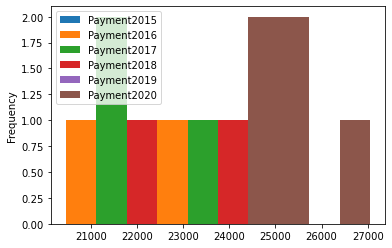

In [47]:
#Check for Normal Distribution
df1[["Payment2015", "Payment2016", "Payment2017", "Payment2018","Payment2019", "Payment2020",]].plot.hist()

In [48]:
#Number of rows and columns
df1.shape

(27, 6)

In [49]:
#Check data type for dataframe
df1.dtypes

Payment2015    float64
Payment2016    float64
Payment2017    float64
Payment2018    float64
Payment2019    float64
Payment2020    float64
dtype: object

In [50]:
#Grand Average
avgall=df1.stack().mean()
avgall

23780.10714285714

In [51]:
#Average per time period
avg2015=df1['Payment2015'].mean()
avg2016=df1['Payment2016'].mean()
avg2017=df1['Payment2017'].mean()
avg2018=df1['Payment2018'].mean()
avg2019=df1['Payment2019'].mean()
avg2020=df1['Payment2020'].mean()
print(avg2015)
print(avg2016)
print(avg2017)
print(avg2018)
print(avg2019)
print(avg2020)

21862.4
22442.25
22521.5
24231.2
25552.0
25552.0


In [52]:
#Standard Deviation for all data across the 4 years
stdall=df1.stack().std()
stdall

1859.4641669296125

In [53]:
#Find Count of hospitals in each year
n_2015=int(df1['Payment2015'].count())
n_2016=int(df1['Payment2016'].count())
n_2017=int(df1['Payment2017'].count())
n_2018=int(df1['Payment2018'].count())
n_2019=int(df1['Payment2019'].count())
n_2020=int(df1['Payment2020'].count())
print(n_2015)
print(n_2016)
print(n_2017)
print(n_2018)
print(n_2019)
print(n_2020)

5
4
4
5
5
5


In [54]:
#Standard Deviation of each timeperiod
std2015=stdall/(math.sqrt(n_2015))
std2016=stdall/(math.sqrt(n_2016))
std2017=stdall/(math.sqrt(n_2017))
std2018=stdall/(math.sqrt(n_2018))
std2019=stdall/(math.sqrt(n_2019))
std2020=stdall/(math.sqrt(n_2020))
print(std2015)
print(std2016)
print(std2017)
print(std2018)
print(std2019)
print(std2020)

831.5776557959259
929.7320834648062
929.7320834648062
831.5776557959259
831.5776557959259
831.5776557959259


In [55]:
zstat = 1.96

In [56]:
#Create dataframe holding values that will support the calculation of UCL and LCL
df3 = [['2015',avg2015,stdall,std2015,avgall,zstat],
       ['2016',avg2016,stdall,std2016,avgall,zstat],
       ['2017',avg2017,stdall,std2017,avgall,zstat],
       ['2018',avg2018,stdall,std2018,avgall,zstat],
       ['2019',avg2019,stdall,std2019,avgall,zstat],
       ['2020',avg2020,stdall,std2020,avgall,zstat]]
df3

[['2015',
  21862.4,
  1859.4641669296125,
  831.5776557959259,
  23780.10714285714,
  1.96],
 ['2016',
  22442.25,
  1859.4641669296125,
  929.7320834648062,
  23780.10714285714,
  1.96],
 ['2017',
  22521.5,
  1859.4641669296125,
  929.7320834648062,
  23780.10714285714,
  1.96],
 ['2018',
  24231.2,
  1859.4641669296125,
  831.5776557959259,
  23780.10714285714,
  1.96],
 ['2019',
  25552.0,
  1859.4641669296125,
  831.5776557959259,
  23780.10714285714,
  1.96],
 ['2020',
  25552.0,
  1859.4641669296125,
  831.5776557959259,
  23780.10714285714,
  1.96]]

In [57]:
#Add column names to the df3 dataframe
df4=pd.DataFrame(df3,columns=['Year', 'Johns Hopkins Hosiptal', 'StdAll','StdPerTime','AvgPaymentAll','zstat'])
df4

,Year,Johns Hopkins Hosiptal,StdAll,StdPerTime,AvgPaymentAll,zstat
0,2015,21862.40,1859.464167,831.577656,23780.107143,1.96
1,2016,22442.25,1859.464167,929.732083,23780.107143,1.96
2,2017,22521.50,1859.464167,929.732083,23780.107143,1.96
3,2018,24231.20,1859.464167,831.577656,23780.107143,1.96
4,2019,25552.00,1859.464167,831.577656,23780.107143,1.96
5,2020,25552.00,1859.464167,831.577656,23780.107143,1.96


In [58]:
df4.dtypes

Year                       object
Johns Hopkins Hosiptal    float64
StdAll                    float64
StdPerTime                float64
AvgPaymentAll             float64
zstat                     float64
dtype: object

In [59]:
#Calculate the UCL and LCL columns
df4['Upper_Control_Limit']=df4['AvgPaymentAll']+df4['zstat']*df4['StdPerTime']
df4['Lower_Control_Limit']=df4['AvgPaymentAll']-df4['zstat']*df4['StdPerTime']
df4

,Year,Johns Hopkins Hosiptal,StdAll,StdPerTime,AvgPaymentAll,zstat,Upper_Control_Limit,Lower_Control_Limit
0,2015,21862.40,1859.464167,831.577656,23780.107143,1.96,25409.999348,22150.214937
1,2016,22442.25,1859.464167,929.732083,23780.107143,1.96,25602.382026,21957.832259
2,2017,22521.50,1859.464167,929.732083,23780.107143,1.96,25602.382026,21957.832259
3,2018,24231.20,1859.464167,831.577656,23780.107143,1.96,25409.999348,22150.214937
4,2019,25552.00,1859.464167,831.577656,23780.107143,1.96,25409.999348,22150.214937
5,2020,25552.00,1859.464167,831.577656,23780.107143,1.96,25409.999348,22150.214937


Text(0, 0.5, 'Mean Cost in USD')

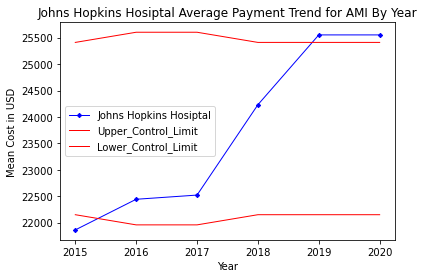

In [69]:
#Create the xbar chart
plt.plot('Year','Johns Hopkins Hosiptal',data=df4, marker = 'D', markerfacecolor = 'blue',
         markersize = 3, color = 'blue', linewidth=1)
plt.plot('Year','Upper_Control_Limit', data=df4, markersize = 1, color = 'red', linewidth=1)
plt.plot('Year','Lower_Control_Limit', data=df4, markersize = 1, color = 'red', linewidth=1)
plt.legend()
plt.title('Johns Hopkins Hosiptal Average Payment Trend for AMI By Year')
plt.xlabel('Year')
plt.ylabel('Mean Cost in USD')

# 3.

In [9]:
data_2015=pd.read_csv('Timely and Effective Care_2015.csv',encoding='ISO-8859-1')
data_2016=pd.read_csv('Timely and Effective Care_2016.csv',encoding='ISO-8859-1')
data_2017=pd.read_csv('Timely and Effective Care_2017.csv',encoding='ISO-8859-1')
data_2018=pd.read_csv('Timely and Effective Care_2018.csv',encoding='ISO-8859-1')
data_2019=pd.read_csv('Timely and Effective Care_2019.csv',encoding='ISO-8859-1')
data_2020=pd.read_csv('Timely and Effective Care_2020.csv',encoding='ISO-8859-1')

In [10]:
print("\033[1m" +'2015 Data Types' + "\033[0m")
print(data_2015.columns)

print("\033[1m" +'2016 Data Types' + "\033[0m")
print(data_2016.columns)

print("\033[1m" +'2017 Data Types' + "\033[0m")
print(data_2017.columns)

print("\033[1m" +'2018 Data Types' + "\033[0m")
print(data_2018.columns)

print("\033[1m" +'2019 Data Types' + "\033[0m")
print(data_2019.columns)

print("\033[1m" +'2020 Data Types' + "\033[0m")
print(data_2020.columns)

2015 Data Types
Index(['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'Condition', 'Measure ID',
       'Measure Name', 'Score', 'Sample', 'Footnote', 'Measure Start Date',
       'Measure End Date'],
      dtype='object')
2016 Data Types
Index(['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'Condition', 'Measure ID',
       'Measure Name', 'Score', 'Sample', 'Footnote', 'Measure Start Date',
       'Measure End Date'],
      dtype='object')
2017 Data Types
Index(['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'Condition', 'Measure ID',
       'Measure Name', 'Score', 'Sample', 'Footnote', 'Measure Start Date',
       'Measure End Date'],
      dtype='object')
2018 Data Types
Index(['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'Conditio

In [12]:
pids = ['JOHNS HOPKINS HOSPITAL, THE', 'GEORGE WASHINGTON UNIV HOSPITAL','MEDSTAR GEORGETOWN UNIVERSITY HOSPITAL',
   'MEDSTAR WASHINGTON HOSPITAL CENTER', 'INOVA FAIRFAX HOSPITAL', 'VIRGINIA HOSPITAL CENTER']

In [13]:
data_2015_filtered=pd.DataFrame(data_2015, columns=['Provider ID', 'Hospital Name', 'City', 'State', 'Measure ID', 
                                                     'Score', 'Sample', 'Measure Start Date', 'Measure End Date'])
data_2015_filtered = data_2015_filtered[(data_2015_filtered['Hospital Name'].isin(pids))]
print("\033[1m" +'2015 Filtered Dataset' + "\033[0m")
print(data_2015_filtered.head(6))

data_2016_filtered=pd.DataFrame(data_2016, columns=['Provider ID', 'Hospital Name', 'City', 'State', 'Measure ID', 
                                                     'Score', 'Sample', 'Measure Start Date', 'Measure End Date'])
data_2016_filtered = data_2016_filtered[(data_2016_filtered['Hospital Name'].isin(pids))]
print("\033[1m" +'2016 Filtered Dataset' + "\033[0m")
print(data_2016_filtered.head(6))

data_2017_filtered=pd.DataFrame(data_2017, columns=['Provider ID', 'Hospital Name', 'City', 'State', 'Measure ID', 
                                                     'Score', 'Sample', 'Measure Start Date', 'Measure End Date'])
data_2017_filtered = data_2017_filtered[(data_2017_filtered['Hospital Name'].isin(pids))]
print("\033[1m" +'2017 Filtered Dataset' + "\033[0m")
print(data_2017_filtered.head(6))

data_2018_filtered=pd.DataFrame(data_2018, columns=['Provider ID', 'Hospital Name', 'City', 'State', 'Measure ID', 
                                                     'Score', 'Sample', 'Measure Start Date', 'Measure End Date'])
data_2018_filtered = data_2018_filtered[(data_2018_filtered['Hospital Name'].isin(pids))]
print("\033[1m" +'2018 Filtered Dataset' + "\033[0m")
print(data_2018_filtered.head(6))

data_2019_filtered=pd.DataFrame(data_2019, columns=['Facility ID', 'Facility Name', 'City', 'State', 'Measure ID', 
                                                     'Score', 'Sample', 'Start Date', 'End Date'])
data_2019_filtered = data_2019_filtered[(data_2019_filtered['Facility Name'].isin(pids))]
print("\033[1m" +'2019 Filtered Dataset' + "\033[0m")
print(data_2019_filtered.head(6))

data_2020_filtered=pd.DataFrame(data_2020, columns=['Facility ID', 'Facility Name', 'City', 'State', 'Measure ID', 
                                                     'Score', 'Sample', 'Start Date', 'End Date'])
data_2020_filtered = data_2020_filtered[(data_2020_filtered['Facility Name'].isin(pids))]
print("\033[1m" +'2020 Filtered Dataset' + "\033[0m")
print(data_2020_filtered.head(6))

2015 Filtered Dataset
      Provider ID                    Hospital Name        City State  \
27209       90001  GEORGE WASHINGTON UNIV HOSPITAL  WASHINGTON    DC   
27210       90001  GEORGE WASHINGTON UNIV HOSPITAL  WASHINGTON    DC   
27211       90001  GEORGE WASHINGTON UNIV HOSPITAL  WASHINGTON    DC   
27212       90001  GEORGE WASHINGTON UNIV HOSPITAL  WASHINGTON    DC   
27213       90001  GEORGE WASHINGTON UNIV HOSPITAL  WASHINGTON    DC   
27214       90001  GEORGE WASHINGTON UNIV HOSPITAL  WASHINGTON    DC   

      Measure ID                                  Score         Sample  \
27209     AMI_7a                          Not Available  Not Available   
27210     AMI_8a                                     95             38   
27211      ED_1b                                    504            584   
27212      ED_2b                                    318            580   
27213        EDV  Very High (60,000+ patients annually)            NaN   
27214       HF_2             

In [17]:
data_2015_filtered ['Score'] = pd.to_numeric(data_2015_filtered['Score'], errors='coerce')
data_2015_filtered = data_2015_filtered.replace(np.nan,0,regex=True)

data_2016_filtered ['Score'] = pd.to_numeric(data_2016_filtered['Score'], errors='coerce')
data_2016_filtered = data_2016_filtered.replace(np.nan,0,regex=True)

data_2017_filtered ['Score'] = pd.to_numeric(data_2017_filtered['Score'], errors='coerce')
data_2017_filtered = data_2017_filtered.replace(np.nan,0,regex=True)

data_2018_filtered ['Score'] = pd.to_numeric(data_2018_filtered['Score'], errors='coerce')
data_2018_filtered = data_2018_filtered.replace(np.nan,0,regex=True)

data_2019_filtered ['Score'] = pd.to_numeric(data_2019_filtered['Score'], errors='coerce')
data_2019_filtered = data_2019_filtered.replace(np.nan,0,regex=True)

data_2020_filtered ['Score'] = pd.to_numeric(data_2020_filtered['Score'], errors='coerce')
data_2020_filtered = data_2020_filtered.replace(np.nan,0,regex=True)

In [18]:
data_2015_filtered ['Sample'] = pd.to_numeric(data_2015_filtered['Sample'], errors='coerce')
data_2015_filtered = data_2015_filtered.replace(np.nan,0,regex=True)

data_2016_filtered ['Sample'] = pd.to_numeric(data_2016_filtered['Sample'], errors='coerce')
data_2016_filtered = data_2016_filtered.replace(np.nan,0,regex=True)

data_2017_filtered ['Sample'] = pd.to_numeric(data_2017_filtered['Sample'], errors='coerce')
data_2017_filtered = data_2017_filtered.replace(np.nan,0,regex=True)

data_2018_filtered ['Sample'] = pd.to_numeric(data_2018_filtered['Sample'], errors='coerce')
data_2018_filtered = data_2018_filtered.replace(np.nan,0,regex=True)

data_2019_filtered ['Sample'] = pd.to_numeric(data_2019_filtered['Sample'], errors='coerce')
data_2019_filtered = data_2019_filtered.replace(np.nan,0,regex=True)

data_2020_filtered ['Sample'] = pd.to_numeric(data_2020_filtered['Sample'], errors='coerce')
data_2020_filtered = data_2020_filtered.replace(np.nan,0,regex=True)

In [19]:
data_2015_filtered.head()

,Provider ID,Hospital Name,City,State,Measure ID,Score,Sample,Measure Start Date,Measure End Date
27209,90001,GEORGE WASHINGTON UNIV HOSPITAL,WASHINGTON,DC,AMI_7a,0.0,0.0,4/1/2014,3/31/2015
27210,90001,GEORGE WASHINGTON UNIV HOSPITAL,WASHINGTON,DC,AMI_8a,95.0,38.0,4/1/2014,3/31/2015
27211,90001,GEORGE WASHINGTON UNIV HOSPITAL,WASHINGTON,DC,ED_1b,504.0,584.0,4/1/2014,3/31/2015
27212,90001,GEORGE WASHINGTON UNIV HOSPITAL,WASHINGTON,DC,ED_2b,318.0,580.0,4/1/2014,3/31/2015
27213,90001,GEORGE WASHINGTON UNIV HOSPITAL,WASHINGTON,DC,EDV,0.0,0.0,1/1/2013,12/31/2013


In [20]:
data_2015_filtered2 = pd.DataFrame(data_2015_filtered[(data_2015_filtered['Hospital Name'].isin(pids))])
print("\033[1m" +'2015 Filtered Dataset' + "\033[0m")
print(data_2015_filtered2['Score'].head(6))

data_2016_filtered2 = pd.DataFrame(data_2016_filtered[(data_2016_filtered['Hospital Name'].isin(pids))])
print("\033[1m" +'2016 Filtered Dataset' + "\033[0m")
print(data_2016_filtered2['Score'].head(6))

data_2017_filtered2 = pd.DataFrame(data_2017_filtered[(data_2017_filtered['Hospital Name'].isin(pids))])
print("\033[1m" +'2017 Filtered Dataset' + "\033[0m")
print(data_2017_filtered2['Score'].head(6))

data_2018_filtered2 = pd.DataFrame(data_2018_filtered[(data_2018_filtered['Hospital Name'].isin(pids))])
print("\033[1m" +'2018 Filtered Dataset' + "\033[0m")
print(data_2018_filtered2['Score'].head(6))

data_2019_filtered2 = pd.DataFrame(data_2019_filtered[(data_2019_filtered['Facility Name'].isin(pids))])
print("\033[1m" +'2019 Filtered Dataset' + "\033[0m")
print(data_2019_filtered2['Score'].head(6))

data_2020_filtered2 = pd.DataFrame(data_2020_filtered[(data_2020_filtered['Facility Name'].isin(pids))])
print("\033[1m" +'2020 Filtered Dataset' + "\033[0m")
print(data_2020_filtered2['Score'].head(6))

2015 Filtered Dataset
27209      0.0
27210     95.0
27211    504.0
27212    318.0
27213      0.0
27214    100.0
Name: Score, dtype: float64
2016 Filtered Dataset
15906    468.0
15907    286.0
15908      0.0
15909     92.0
15910     96.0
15911      0.0
Name: Score, dtype: float64
2017 Filtered Dataset
16016    529.0
16017    330.0
16018      0.0
16019     92.0
16020     97.0
16021      0.0
Name: Score, dtype: float64
2018 Filtered Dataset
16675    500.0
16676    323.0
16677      0.0
16678     93.0
16679     97.0
16680      0.0
Name: Score, dtype: float64
2019 Filtered Dataset
13756      0.0
13757    626.0
13758    432.0
13759     86.0
13760     99.0
13761    281.0
Name: Score, dtype: float64
2020 Filtered Dataset
13832      0.0
13833    500.0
13834     99.0
13835    305.0
13836    466.0
13837      0.0
Name: Score, dtype: float64


In [25]:
print(data_2015_filtered2.shape)
print(data_2016_filtered2.shape)
print(data_2017_filtered2.shape)
print(data_2018_filtered2.shape)
print(data_2019_filtered2.shape)
print(data_2020_filtered2.shape)

(242, 9)
(132, 9)
(132, 9)
(138, 9)
(114, 9)
(114, 9)


In [24]:
#Calculate average satisfation at JOHNS HOPKINS HOSPITAL across all 6 time periods
hosp = ['JOHNS HOPKINS HOSPITAL, THE']

data_2015_j = pd.DataFrame(data_2015_filtered2[(data_2015_filtered2['Hospital Name'].isin(hosp))])
avgsatis_j_2015 = data_2015_j['Score'].mean()

data_2016_j = pd.DataFrame(data_2016_filtered2[(data_2016_filtered2['Hospital Name'].isin(hosp))])
avgsatis_j_2016 = data_2016_j['Score'].mean()

data_2017_j = pd.DataFrame(data_2017_filtered2[(data_2017_filtered2['Hospital Name'].isin(hosp))])
avgsatis_j_2017 = data_2017_j['Score'].mean()

data_2018_j = pd.DataFrame(data_2018_filtered2[(data_2018_filtered2['Hospital Name'].isin(hosp))])
avgsatis_j_2018 = data_2018_j['Score'].mean()

data_2019_j = pd.DataFrame(data_2019_filtered2[(data_2019_filtered2['Facility Name'].isin(hosp))])
avgsatis_j_2019 = data_2019_j['Score'].mean()

data_2020_j = pd.DataFrame(data_2020_filtered2[(data_2020_filtered2['Facility Name'].isin(hosp))])
avgsatis_j_2020 = data_2020_j['Score'].mean()

print(avgsatis_j_2015)
print(avgsatis_j_2016)
print(avgsatis_j_2017)
print(avgsatis_j_2018)
print(avgsatis_j_2019)
print(avgsatis_j_2020)

63.55
65.63636363636364
0.0
93.30434782608695
114.73684210526316
98.05263157894737


In [22]:
samc.dtypes

NameError: name 'samc' is not defined

In [26]:
dfs = [data_2015_filtered2, data_2016_filtered2, data_2017_filtered2, data_2018_filtered2, data_2019_filtered2,data_2020_filtered2]  
samc = pd.concat(dfs)
samc

,Provider ID,Hospital Name,City,State,Measure ID,Score,Sample,Measure Start Date,Measure End Date,Facility ID,Facility Name,Start Date,End Date
27209,90001,GEORGE WASHINGTON UNIV HOSPITAL,WASHINGTON,DC,AMI_7a,0.0,0.0,4/1/2014,3/31/2015,NaN,NaN,NaN,NaN
27210,90001,GEORGE WASHINGTON UNIV HOSPITAL,WASHINGTON,DC,AMI_8a,95.0,38.0,4/1/2014,3/31/2015,NaN,NaN,NaN,NaN
27211,90001,GEORGE WASHINGTON UNIV HOSPITAL,WASHINGTON,DC,ED_1b,504.0,584.0,4/1/2014,3/31/2015,NaN,NaN,NaN,NaN
27212,90001,GEORGE WASHINGTON UNIV HOSPITAL,WASHINGTON,DC,ED_2b,318.0,580.0,4/1/2014,3/31/2015,NaN,NaN,NaN,NaN
27213,90001,GEORGE WASHINGTON UNIV HOSPITAL,WASHINGTON,DC,EDV,0.0,0.0,1/1/2013,12/31/2013,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82588,NaN,NaN,FALLS CHURCH,VA,SEP_1,66.0,453.0,NaN,NaN,490063,INOVA FAIRFAX HOSPITAL,07/01/2018,06/30/2019
82589,NaN,NaN,FALLS CHURCH,VA,SEP_SH_3HR,89.0,206.0,NaN,NaN,490063,INOVA FAIRFAX HOSPITAL,01/01/2019,06/30/2019
82590,NaN,NaN,FALLS CHURCH,VA,SEP_SH_6HR,62.0,52.0,NaN,NaN,490063,INOVA FAIRFAX HOSPITAL,01/01/2019,06/30/2019
82591,NaN,NaN,FALLS CHURCH,VA,SEV_SEP_3HR,78.0,277.0,NaN,NaN,490063,INOVA FAIRFAX HOSPITAL,01/01/2019,06/30/2019


In [27]:
samc.fillna(0, inplace=True)

In [28]:
#Convert data types
samc['Score'] = pd.to_numeric(samc['Score'])
samc['Sample'] = pd.to_numeric(samc['Sample'])
samc['Measure Start Date'] = pd.to_datetime(samc['Measure Start Date'])
samc['Measure End Date'] = pd.to_datetime(samc['Measure End Date'])
samc.dtypes

Provider ID                   object
Hospital Name                 object
City                          object
State                         object
Measure ID                    object
Score                        float64
Sample                       float64
Measure Start Date    datetime64[ns]
Measure End Date      datetime64[ns]
Facility ID                   object
Facility Name                 object
Start Date                    object
End Date                      object
dtype: object

In [40]:
#Create a data frame containing Sample data from all 6 years
df = [data_2015_filtered2['Sample'], data_2016_filtered2['Sample'],
      data_2017_filtered2['Sample'], data_2018_filtered2['Sample'],
      data_2019_filtered2['Sample'], data_2020_filtered2['Sample']]
headers = ['Sample2015', 'Sample2016', 'Sample2017', 'Sample2018', 'Sample2019', 'Sample2020']
df1=pd.concat(df,axis=1,keys=headers)
df1.head()

,Sample2015,Sample2016,Sample2017,Sample2018,Sample2019,Sample2020
13756,NaN,NaN,NaN,NaN,0.0,NaN
13757,NaN,NaN,NaN,NaN,584.0,NaN
13758,NaN,NaN,NaN,NaN,582.0,NaN
13759,NaN,NaN,NaN,NaN,516.0,NaN
13760,NaN,NaN,NaN,NaN,4012.0,NaN


In [41]:
avg2015=df1['Sample2015'].mean()
avg2016=df1['Sample2016'].mean()
avg2017=df1['Sample2017'].mean()
avg2018=df1['Sample2018'].mean()
avg2019=df1['Sample2019'].mean()
avg2020=df1['Sample2020'].mean()
print(avg2015)
print(avg2016)
print(avg2017)
print(avg2018)
print(avg2019)
print(avg2020)

2411.6404958677685
4323.151515151515
3547.651515151515
4263.144927536232
4848.754385964912
4902.578947368421


In [42]:
stdall=df1.stack().std()
stdall

17954.19411624599

In [43]:
#Find Count of hospitals in each year
n_2015=int(df1['Sample2015'].count())
n_2016=int(df1['Sample2016'].count())
n_2017=int(df1['Sample2017'].count())
n_2018=int(df1['Sample2018'].count())
n_2019=int(df1['Sample2019'].count())
n_2020=int(df1['Sample2020'].count())
print(n_2015)
print(n_2016)
print(n_2017)
print(n_2018)
print(n_2019)
print(n_2020)

242
132
132
138
114
114


In [45]:
#Standard Deviation of each timeperiod
std2015=stdall/(math.sqrt(n_2015))
std2016=stdall/(math.sqrt(n_2016))
std2017=stdall/(math.sqrt(n_2017))
std2018=stdall/(math.sqrt(n_2018))
std2019=stdall/(math.sqrt(n_2019))
std2020=stdall/(math.sqrt(n_2020))
print(std2015)
print(std2016)
print(std2017)
print(std2018)
print(std2019)
print(std2020)

1154.1393100306504
1562.7120131648421
1562.7120131648421
1528.36249959647
1681.5643467659527
1681.5643467659527


In [44]:
#Calcuate Midway Point: ( [Measure Start Date] + [Measure End Data] ) / 2  
samc['Midpoint Date'] = samc['Measure Start Date'] + (samc['Measure End Date'] - samc['Measure Start Date'])/2

#Calcuate Rate of Overuse: [Score] / [Sample]
RateOveruse= samc['Score']/samc['Sample']

#Grand Rate: SUM (Score) / SUM (Sample)
Grandrate = sum(samc['Score'])/sum(samc['Sample'])

samc

,Provider ID,Hospital Name,City,State,Measure ID,Score,Sample,Measure Start Date,Measure End Date,Facility ID,Facility Name,Start Date,End Date,Midpoint Date,RateOveruse,Grandrate,UCL,LCL
27209,90001,GEORGE WASHINGTON UNIV HOSPITAL,WASHINGTON,DC,AMI_7a,0.0,0.0,2014-04-01,2015-03-31,0,0,0,0,2014-09-30,NaN,0.020661,inf,-inf
27210,90001,GEORGE WASHINGTON UNIV HOSPITAL,WASHINGTON,DC,AMI_8a,95.0,38.0,2014-04-01,2015-03-31,0,0,0,0,2014-09-30,2.500000,0.020661,0.065890,-0.024567
27211,90001,GEORGE WASHINGTON UNIV HOSPITAL,WASHINGTON,DC,ED_1b,504.0,584.0,2014-04-01,2015-03-31,0,0,0,0,2014-09-30,0.863014,0.020661,0.032198,0.009124
27212,90001,GEORGE WASHINGTON UNIV HOSPITAL,WASHINGTON,DC,ED_2b,318.0,580.0,2014-04-01,2015-03-31,0,0,0,0,2014-09-30,0.548276,0.020661,0.032238,0.009085
27213,90001,GEORGE WASHINGTON UNIV HOSPITAL,WASHINGTON,DC,EDV,0.0,0.0,2013-01-01,2013-12-31,0,0,0,0,2013-07-02,NaN,0.020661,inf,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82588,0,0,FALLS CHURCH,VA,SEP_1,66.0,453.0,1970-01-01,1970-01-01,490063,INOVA FAIRFAX HOSPITAL,07/01/2018,06/30/2019,1970-01-01,0.145695,0.020661,0.033761,0.007562
82589,0,0,FALLS CHURCH,VA,SEP_SH_3HR,89.0,206.0,1970-01-01,1970-01-01,490063,INOVA FAIRFAX HOSPITAL,01/01/2019,06/30/2019,1970-01-01,0.432039,0.020661,0.040087,0.001236
82590,0,0,FALLS CHURCH,VA,SEP_SH_6HR,62.0,52.0,1970-01-01,1970-01-01,490063,INOVA FAIRFAX HOSPITAL,01/01/2019,06/30/2019,1970-01-01,1.192308,0.020661,0.059325,-0.018002
82591,0,0,FALLS CHURCH,VA,SEV_SEP_3HR,78.0,277.0,1970-01-01,1970-01-01,490063,INOVA FAIRFAX HOSPITAL,01/01/2019,06/30/2019,1970-01-01,0.281588,0.020661,0.037413,0.003910


In [47]:
df3 = [['2015',n_2015,stdall,std2015,Grandrate,zstat],
       ['2016',n_2016,stdall,std2016,Grandrate,zstat],
       ['2017',n_2017,stdall,std2017,Grandrate,zstat],
       ['2018',n_2018,stdall,std2018,Grandrate,zstat],
       ['2019',n_2019,stdall,std2019,Grandrate,zstat],
       ['2020',n_2020,stdall,std2020,Grandrate,zstat]]
df3

[['2015',
  2411.6404958677685,
  17954.19411624599,
  1154.1393100306504,
  0.020661369697600834,
  1.96],
 ['2016',
  4323.151515151515,
  17954.19411624599,
  1562.7120131648421,
  0.020661369697600834,
  1.96],
 ['2017',
  3547.651515151515,
  17954.19411624599,
  1562.7120131648421,
  0.020661369697600834,
  1.96],
 ['2018',
  4263.144927536232,
  17954.19411624599,
  1528.36249959647,
  0.020661369697600834,
  1.96],
 ['2019',
  4848.754385964912,
  17954.19411624599,
  1681.5643467659527,
  0.020661369697600834,
  1.96],
 ['2020',
  4902.578947368421,
  17954.19411624599,
  1681.5643467659527,
  0.020661369697600834,
  1.96]]

In [48]:
zstat = 1.96

In [49]:
df2=pd.DataFrame(df3,columns=['Year', 'Johns Hopkins Hosiptal', 'StdAll','AvgSample','Grandrate','zstat'])
df2

,Year,Johns Hopkins Hosiptal,StdAll,AvgSample,Grandrate,zstat
0,2015,2411.640496,17954.194116,1154.139310,0.020661,1.96
1,2016,4323.151515,17954.194116,1562.712013,0.020661,1.96
2,2017,3547.651515,17954.194116,1562.712013,0.020661,1.96
3,2018,4263.144928,17954.194116,1528.362500,0.020661,1.96
4,2019,4848.754386,17954.194116,1681.564347,0.020661,1.96
5,2020,4902.578947,17954.194116,1681.564347,0.020661,1.96


In [52]:
#Calculate the UCL and LCL columns
df2['UCL']=df2['Grandrate']+df2['zstat']*df2['AvgSample']
df2['LCL']=df2['Grandrate']-df2['zstat']*df2['AvgSample']
df2

,Year,Johns Hopkins Hosiptal,StdAll,AvgSample,Grandrate,zstat,Upper_Control_Limit,Lower_Control_Limit,UCL,LCL
0,2015,2411.640496,17954.194116,1154.139310,0.020661,1.96,2262.133709,-2262.092386,2262.133709,-2262.092386
1,2016,4323.151515,17954.194116,1562.712013,0.020661,1.96,3062.936207,-3062.894884,3062.936207,-3062.894884
2,2017,3547.651515,17954.194116,1562.712013,0.020661,1.96,3062.936207,-3062.894884,3062.936207,-3062.894884
3,2018,4263.144928,17954.194116,1528.362500,0.020661,1.96,2995.611161,-2995.569838,2995.611161,-2995.569838
4,2019,4848.754386,17954.194116,1681.564347,0.020661,1.96,3295.886781,-3295.845458,3295.886781,-3295.845458
5,2020,4902.578947,17954.194116,1681.564347,0.020661,1.96,3295.886781,-3295.845458,3295.886781,-3295.845458


In [59]:
samc['UCL'] = samc['Grandrate'] + (1.96 * np.sqrt((samc['Grandrate'] * (1 - samc['Grandrate']))/samc['Sample']))
samc['LCL'] = samc['Grandrate'] - (1.96 * np.sqrt((samc['Grandrate'] * (1 - samc['Grandrate']))/samc['Sample']))
samc

,Provider ID,Hospital Name,City,State,Measure ID,Score,Sample,Measure Start Date,Measure End Date,Facility ID,Facility Name,Start Date,End Date,Midpoint Date,RateOveruse,Grandrate,UCL,LCL
27209,90001,GEORGE WASHINGTON UNIV HOSPITAL,WASHINGTON,DC,AMI_7a,0.0,0.0,2014-04-01,2015-03-31,0,0,0,0,2014-09-30,NaN,0.020661,inf,-inf
27210,90001,GEORGE WASHINGTON UNIV HOSPITAL,WASHINGTON,DC,AMI_8a,95.0,38.0,2014-04-01,2015-03-31,0,0,0,0,2014-09-30,2.500000,0.020661,0.065890,-0.024567
27211,90001,GEORGE WASHINGTON UNIV HOSPITAL,WASHINGTON,DC,ED_1b,504.0,584.0,2014-04-01,2015-03-31,0,0,0,0,2014-09-30,0.863014,0.020661,0.032198,0.009124
27212,90001,GEORGE WASHINGTON UNIV HOSPITAL,WASHINGTON,DC,ED_2b,318.0,580.0,2014-04-01,2015-03-31,0,0,0,0,2014-09-30,0.548276,0.020661,0.032238,0.009085
27213,90001,GEORGE WASHINGTON UNIV HOSPITAL,WASHINGTON,DC,EDV,0.0,0.0,2013-01-01,2013-12-31,0,0,0,0,2013-07-02,NaN,0.020661,inf,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82588,0,0,FALLS CHURCH,VA,SEP_1,66.0,453.0,1970-01-01,1970-01-01,490063,INOVA FAIRFAX HOSPITAL,07/01/2018,06/30/2019,1970-01-01,0.145695,0.020661,0.033761,0.007562
82589,0,0,FALLS CHURCH,VA,SEP_SH_3HR,89.0,206.0,1970-01-01,1970-01-01,490063,INOVA FAIRFAX HOSPITAL,01/01/2019,06/30/2019,1970-01-01,0.432039,0.020661,0.040087,0.001236
82590,0,0,FALLS CHURCH,VA,SEP_SH_6HR,62.0,52.0,1970-01-01,1970-01-01,490063,INOVA FAIRFAX HOSPITAL,01/01/2019,06/30/2019,1970-01-01,1.192308,0.020661,0.059325,-0.018002
82591,0,0,FALLS CHURCH,VA,SEV_SEP_3HR,78.0,277.0,1970-01-01,1970-01-01,490063,INOVA FAIRFAX HOSPITAL,01/01/2019,06/30/2019,1970-01-01,0.281588,0.020661,0.037413,0.003910


In [64]:
hosp = ['JOHNS HOPKINS HOSPITAL, THE']
samc1 =  pd.DataFrame(data_2015_filtered2[(data_2015_filtered2['Hospital Name'].isin(hosp))])

In [65]:
samc1

,Provider ID,Hospital Name,City,State,Measure ID,Score,Sample,Measure Start Date,Measure End Date
72516,210009,"JOHNS HOPKINS HOSPITAL, THE",BALTIMORE,MD,AMI_7a,0.0,0.0,4/1/2014,3/31/2015
72517,210009,"JOHNS HOPKINS HOSPITAL, THE",BALTIMORE,MD,AMI_8a,0.0,0.0,4/1/2014,3/31/2015
72518,210009,"JOHNS HOPKINS HOSPITAL, THE",BALTIMORE,MD,CAC_3,98.0,329.0,4/1/2014,3/31/2015
72519,210009,"JOHNS HOPKINS HOSPITAL, THE",BALTIMORE,MD,ED_1b,519.0,437.0,4/1/2014,3/31/2015
72520,210009,"JOHNS HOPKINS HOSPITAL, THE",BALTIMORE,MD,ED_2b,211.0,437.0,4/1/2014,3/31/2015
72521,210009,"JOHNS HOPKINS HOSPITAL, THE",BALTIMORE,MD,EDV,0.0,0.0,1/1/2013,12/31/2013
72522,210009,"JOHNS HOPKINS HOSPITAL, THE",BALTIMORE,MD,HF_2,100.0,318.0,4/1/2014,3/31/2015
72523,210009,"JOHNS HOPKINS HOSPITAL, THE",BALTIMORE,MD,IMM_2,97.0,542.0,10/1/2014,3/31/2015
72524,210009,"JOHNS HOPKINS HOSPITAL, THE",BALTIMORE,MD,OP_1,0.0,0.0,4/1/2014,3/31/2015
72525,210009,"JOHNS HOPKINS HOSPITAL, THE",BALTIMORE,MD,OP_18b,256.0,347.0,4/1/2014,3/31/2015


In [12]:
#Create the p-chart
plt.plot('2020', 'RateOveruse', data=samc, marker = 'o', markerfacecolor = 'blue', linewidth =1, color = 'blue')
plt.plot('2020', 'UCL', data=samc, markersize = 0, color = 'red', linewidth =1)
plt.plot('2020', 'LCL', data=samc, markersize = 0, color = 'red', linewidth =1)
plt.legend()
plt.title('Johns Hopkins Hosiptal RateOveruse')
plt.xlabel('Midpoint Date')o
plt.ylabel('Rate of Overuse')

SyntaxError: invalid syntax (<ipython-input-12-9ffbfc1013aa>, line 7)

# 4.

In [25]:
data=pd.read_csv('Complications and Deaths_2020.csv',engine='python')
data

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,COMP_HIP_KNEE,Rate of complications for hip/knee replacement...,No Different Than the National Rate,292,3.2,2.1,4.8,NaN,04/01/2015,03/31/2018
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MORT_30_AMI,Death rate for heart attack patients,No Different Than the National Rate,688,13,11,15.5,NaN,07/01/2015,06/30/2018
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MORT_30_CABG,Death rate for CABG surgery patients,No Different Than the National Rate,291,4.3,2.6,6.8,NaN,07/01/2015,06/30/2018
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MORT_30_COPD,Death rate for COPD patients,No Different Than the National Rate,411,8.8,6.7,11.4,NaN,07/01/2015,06/30/2018
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,(334) 793-8701,MORT_30_HF,Death rate for heart failure patients,No Different Than the National Rate,869,12.7,10.7,15,NaN,07/01/2015,06/30/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91375,670130,SOUTHCROSS HOSPITAL,4243 EAST SOUTHCROSS BLVD SUITE 100,SAN ANTONIO,TX,78222,BEXAR,(210) 507-4392,PSI_4_SURG_COMP,Deaths among Patients with Serious Treatable C...,Not Available,Not Available,Not Available,Not Available,Not Available,19.0,07/01/2016,06/30/2018
91376,670130,SOUTHCROSS HOSPITAL,4243 EAST SOUTHCROSS BLVD SUITE 100,SAN ANTONIO,TX,78222,BEXAR,(210) 507-4392,PSI_6_IAT_PTX,Collapsed lung due to medical treatment,Not Available,Not Available,Not Available,Not Available,Not Available,19.0,07/01/2016,06/30/2018
91377,670130,SOUTHCROSS HOSPITAL,4243 EAST SOUTHCROSS BLVD SUITE 100,SAN ANTONIO,TX,78222,BEXAR,(210) 507-4392,PSI_8_POST_HIP,Broken hip from a fall after surgery,Not Available,Not Available,Not Available,Not Available,Not Available,19.0,07/01/2016,06/30/2018
91378,670130,SOUTHCROSS HOSPITAL,4243 EAST SOUTHCROSS BLVD SUITE 100,SAN ANTONIO,TX,78222,BEXAR,(210) 507-4392,PSI_90_SAFETY,Serious complications,Not Available,Not Available,Not Available,Not Available,Not Available,19.0,07/01/2016,06/30/2018


In [26]:
data1=data[data['Measure ID']=="MORT_30_AMI"]
data1

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date


In [27]:
data1.dtypes

Provider ID              object
Hospital Name            object
Address                  object
City                     object
State                    object
ZIP Code                  int64
County Name              object
Phone Number             object
Measure Name             object
Measure ID               object
Compared to National     object
Denominator              object
Score                    object
Lower Estimate           object
Higher Estimate          object
Footnote                float64
Measure Start Date       object
Measure End Date         object
dtype: object

In [28]:
print("\033[1m" +'Data Types' + "\033[0m")
print(data1.columns)

Data Types
Index(['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
       'County Name', 'Phone Number', 'Measure Name', 'Measure ID',
       'Compared to National', 'Denominator', 'Score', 'Lower Estimate',
       'Higher Estimate', 'Footnote', 'Measure Start Date',
       'Measure End Date'],
      dtype='object')


In [29]:
data1['Score'] = pd.to_numeric(data1['Score'], errors='coerce')
data1 = data1.replace(np.nan,0,regex=True)

In [30]:
data1['Denominator'] = pd.to_numeric(data1['Denominator'], errors='coerce')
data1 = data1.replace(np.nan,0,regex=True)

In [31]:
data1.dtypes

Provider ID              object
Hospital Name            object
Address                  object
City                     object
State                    object
ZIP Code                  int64
County Name              object
Phone Number             object
Measure Name             object
Measure ID               object
Compared to National     object
Denominator               int64
Score                     int64
Lower Estimate           object
Higher Estimate          object
Footnote                float64
Measure Start Date       object
Measure End Date         object
dtype: object

In [277]:
Comp_Rate2.min()

0.0001952065936449409

In [2]:
#Import libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_column',None)
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
data= pd.read_csv('MORTRATE.csv',engine='python')

In [11]:
data

,ï»¿Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date,Midpoint Date
0,210009,"JOHNS HOPKINS HOSPITAL, THE",600 NORTH WOLFE STREET,BALTIMORE,MD,21287,BALTIMORE CITY,4109559540,Death rate for heart attack patients,MORT_30_AMI,No Different than the National Rate,235,10.4,8.0,13.3,23 - The data are based on claims that the hos...,2014-07-01,2017-06-30,2015-12-30 12:00:00


In [6]:
data=data[(data['Hospital Name']=='JOHNS HOPKINS HOSPITAL, THE')&
             (data['Measure ID']=='MORT_30_AMI')]

In [7]:
data

,ï»¿Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date
0,210009,"JOHNS HOPKINS HOSPITAL, THE",600 NORTH WOLFE STREET,BALTIMORE,MD,21287,BALTIMORE CITY,4109559540,Death rate for heart attack patients,MORT_30_AMI,No Different than the National Rate,235,10.4,8.0,13.3,23 - The data are based on claims that the hos...,07/01/2014,06/30/2017


In [8]:
data['Measure Start Date']=pd.to_datetime(data['Measure Start Date'])
data['Measure End Date']=pd.to_datetime(data['Measure End Date'])

In [9]:
data['Midpoint Date'] = data['Measure Start Date'] + (data['Measure End Date'] - data['Measure Start Date'] )/2
data

,ï»¿Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date,Midpoint Date
0,210009,"JOHNS HOPKINS HOSPITAL, THE",600 NORTH WOLFE STREET,BALTIMORE,MD,21287,BALTIMORE CITY,4109559540,Death rate for heart attack patients,MORT_30_AMI,No Different than the National Rate,235,10.4,8.0,13.3,23 - The data are based on claims that the hos...,2014-07-01,2017-06-30,2015-12-30 12:00:00


In [25]:
df1=pd.DataFrame(data1, columns =['Provider ID', 'Hospital Name', 'Compared to National', 'Measure ID',
                                                     'Denominator','Measure Start Date', 'Measure End Date'] )
df2=pd.DataFrame(data2, columns =['Provider ID', 'Hospital Name', 'Compared to National', 'Measure ID',
                                                     'Denominator','Measure Start Date', 'Measure End Date'] )
df3=pd.DataFrame(data3, columns =['Provider ID', 'Hospital Name', 'Compared to National', 'Measure ID',
                                                     'Denominator','Measure Start Date', 'Measure End Date'] )
df4=pd.DataFrame(data4, columns =['Provider ID', 'Hospital Name', 'Compared to National', 'Measure ID',
                                                     'Denominator','Measure Start Date', 'Measure End Date'] )

In [10]:
Median=data['Score'].median()
Median

10.4

In [1]:
data1['Denominator'] = pd.to_numeric(data1['Denominator'], errors='coerce')
data1 = data1.replace(np.nan,0,regex=True)
data2['Denominator'] = pd.to_numeric(data2['Denominator'], errors='coerce')
data2 = data2.replace(np.nan,0,regex=True)
data3['Denominator'] = pd.to_numeric(data3['Denominator'], errors='coerce')
data3 = data3.replace(np.nan,0,regex=True)
data4['Denominator'] = pd.to_numeric(data4['Denominator'], errors='coerce')
data4 = data4.replace(np.nan,0,regex=True)

NameError: name 'pd' is not defined